# AcrossTheBorders: 


# SYRIAN REFUGEE(IN TURKEY) TWEETS SENTIMENT ANALYSIS AND FAKE JOB DETECTION

### IMPORTING THE REQUIRED PACKAGES AND MODULES

In [2]:
import pandas as pd              #for data analysis and basic operations
import numpy as np               #for data analysis and basic operations
import re                        #for regex
import seaborn as sns            #for data visualisation
import matplotlib.pyplot as plt  #for data visualisation
from matplotlib import style     #style for the plot
style.use('ggplot')
from textblob import TextBlob                    #process the textual data
from nltk.tokenize import word_tokenize          #for tokenization
from nltk.stem import PorterStemmer              #for stemming
from nltk.corpus import stopwords                #to remove stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer                          #to vectorize the text document
from sklearn.model_selection import train_test_split                                 #to split the data into training and testing data
from sklearn.linear_model import LogisticRegression                                  #to perform logistic regression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay # for evaluating accuracy and displaying matrix for evaluating the model

### READING  AND DISPLAYING THE DATASET

In [3]:
df = pd.read_csv('syrian_refugees.csv')

In [4]:
df.head(50)

,ID,text,Share,Likes
0,1.562990e+18,Praying for my syrians 🙏🏽🙏🏽🙏🏽,0,0
1,1.562990e+18,Syrians need to be supported #tough time for s...,0,0
2,1.562990e+18,Love syria,0,0
3,1.562990e+18,syrians return back to your country,0,0
4,1.562990e+18,good night syrians https://t.co/0PAMOUpXUz,1,2
5,1.562990e+18,Big syrian haters,0,0
6,1.562990e+18,Syrians deserve better than this.,0,0
7,1.562990e+18,Syrians stop exhausting our resources #stop it,0,0
8,1.562990e+18,Take the syrians out from our country,0,0
9,1.562990e+18,Hate for syrians # we hate,0,0


In [5]:
df.info()          #to describe the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32456 entries, 0 to 32455
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      32456 non-null  float64
 1   text    32456 non-null  object 
 2   Share   32456 non-null  int64  
 3   Likes   32456 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1014.4+ KB


In [6]:
df.columns        #to obtain the column names

Index(['ID', 'text', 'Share', 'Likes'], dtype='object')

### CREATING A NEW DATAFRAME FOR TWEETS

In [7]:
text_df = df.drop(['Likes', 'ID', 'Share'], axis=1) #drop all columns except the "text" column
text_df.head(50)                                   #new dataframe

,text
0,Praying for my syrians 🙏🏽🙏🏽🙏🏽
1,Syrians need to be supported #tough time for s...
2,Love syria
3,syrians return back to your country
4,good night syrians https://t.co/0PAMOUpXUz
5,Big syrian haters
6,Syrians deserve better than this.
7,Syrians stop exhausting our resources #stop it
8,Take the syrians out from our country
9,Hate for syrians # we hate


In [8]:
print(text_df['text'].iloc[0],"\n")   #analyse data in the "text" dataframe
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Praying for my syrians 🙏🏽🙏🏽🙏🏽 

Syrians need to be supported #tough time for syrians 

Love syria 

syrians return back to your country 

good night syrians  https://t.co/0PAMOUpXUz 



In [9]:
text_df.info() #to describe the new dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32456 entries, 0 to 32455
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    32456 non-null  object
dtypes: object(1)
memory usage: 253.7+ KB


### CONVERSION OF RAW DATA TO USEFUL DATA

In [10]:
def data_processing(text):            #to convert the raw data into usable format
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)  #remove URLs
    text = re.sub(r'\@w+|\#','',text) #remove hashtags 
    text = re.sub(r'[^\w\s]','',text) #remove punctuation marks
    text_tokens = word_tokenize(text) #remove stopwords
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [11]:
text_df.text = text_df['text'].apply(data_processing) 

In [12]:
text_df = text_df.drop_duplicates('text')  #remove duplicate data

### STEMMING 

In [13]:
stemmer = PorterStemmer()  #stemming for reducing tokenized words to their root form
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [14]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x)) #apply stemming to the processed data


In [15]:
text_df.head(50)

,text
0,praying syrians
1,syrians need supported tough time syrians
2,love syria
3,syrians return back country
4,good night syrians
5,big syrian haters
6,syrians deserve better
7,syrians stop exhausting resources stop
8,take syrians country
9,hate syrians hate


In [16]:
print(text_df['text'].iloc[0],"\n") 
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

praying syrians 

syrians need supported tough time syrians 

love syria 

syrians return back country 

good night syrians 



In [17]:
text_df.info() #updated dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30587 entries, 0 to 32455
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    30587 non-null  object
dtypes: object(1)
memory usage: 477.9+ KB


### CALCULATING THE POLARITY

In [18]:
def polarity(text):                          #to calculate polarity using TextBlob
    return TextBlob(text).sentiment.polarity

In [19]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [20]:
text_df.head(50)

,text,polarity
0,praying syrians,0.000000
1,syrians need supported tough time syrians,-0.388889
2,love syria,0.500000
3,syrians return back country,0.000000
4,good night syrians,0.700000
5,big syrian haters,0.000000
6,syrians deserve better,0.500000
7,syrians stop exhausting resources stop,-0.400000
8,take syrians country,0.000000
9,hate syrians hate,-0.800000


### OBTAINING THE SENTIMENT LABEL FOR EACH TWEET

In [21]:
def sentiment(label):     #to define the sentiment of a particular tweet
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [22]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [23]:
text_df.head(50)

,text,polarity,sentiment
0,praying syrians,0.000000,Neutral
1,syrians need supported tough time syrians,-0.388889,Negative
2,love syria,0.500000,Positive
3,syrians return back country,0.000000,Neutral
4,good night syrians,0.700000,Positive
5,big syrian haters,0.000000,Neutral
6,syrians deserve better,0.500000,Positive
7,syrians stop exhausting resources stop,-0.400000,Negative
8,take syrians country,0.000000,Neutral
9,hate syrians hate,-0.800000,Negative


### VISUALIZATION OF DATA USING COUNTPLOT AND PIE CHART

<AxesSubplot:xlabel='sentiment', ylabel='count'>

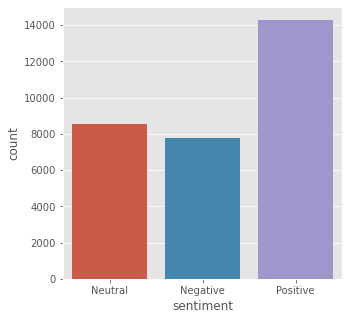

In [24]:
fig = plt.figure(figsize=(5,5))                #data visualization using countplot
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, '*** VISUALIZATION OF SENTIMENTS ***')

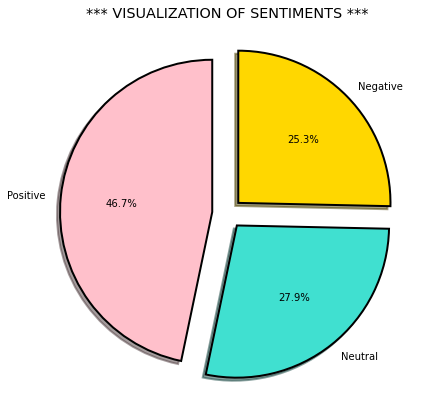

In [25]:
fig = plt.figure(figsize=(7,7))                #data visualization using pie chart
colors = ("pink", "turquoise", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('*** VISUALIZATION OF SENTIMENTS ***')

### BUILDING THE MODEL

In [26]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])  #count vectorization for the model

In [27]:
feature_names = vect.get_feature_names()                        #get and print the first 30 features
print("Total number of features are: {}\n".format(len(feature_names)))
print("The first 30 features are:\n {}".format(feature_names[:30]))

Total number of features are: 405318

The first 30 features are:
 ['00', '00 correct', '000', '000 per', '000 size', '00s', '00s even', '00s internet', '00s lgbt', '00s wasnt', '00s yaoi', '01', '01 872', '01 actually', '01 albums', '01 lgbt', '01 lgbtq', '01 spider', '01000100', '01000100 01010010', '01000101', '01000101 01001110', '01000111', '01000111 01000101', '01001110', '01001110 01000100', '01010010', '01010010 lgbt', '01_victhor_01', '01_victhor_01 reached']


C:\Users\sihus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
X = text_df['text']                 #separation of data into x and y for transformation
Y = text_df['sentiment']
X = vect.transform(X)

In [29]:
#split the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [30]:
#print the size of training and testing data

print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))

print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (24469, 405318)
Size of y_train: (24469,)
Size of x_test: (6118, 405318)
Size of y_test: (6118,)


In [31]:
#to get rid of warnings

import warnings
warnings.filterwarnings('ignore')

### TRAINING THE MODEL

In [32]:
#train the data on logicticregression model

logreg = LogisticRegression()

logreg.fit(x_train, y_train) #fit the data
logreg_pred = logreg.predict(x_test) #predict the value for test data

logreg_acc = accuracy_score(logreg_pred, y_test) #calculate the accuracy for the model
print("Accuracy of the model is: {:.2f}%".format(logreg_acc*100)) 

Accuracy of the model is: 86.58%


### OBTAINING THE CLASSIFICATION REPORT AND PRINTING THE RELEVANT CONFUSION MATRIX

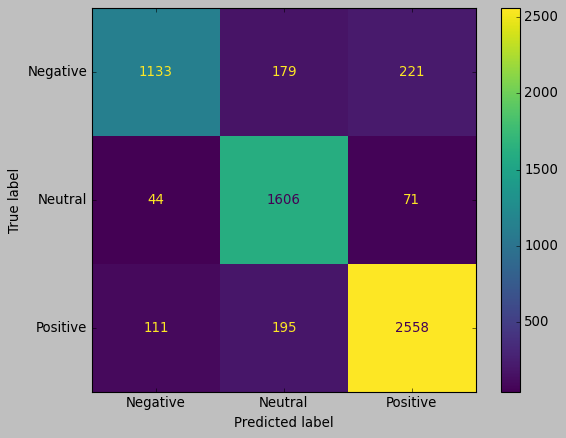

In [33]:
#display the confusion matrix

style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [34]:
#print the confusion matrix and classification report


print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[1133  179  221]
 [  44 1606   71]
 [ 111  195 2558]]


              precision    recall  f1-score   support

    Negative       0.88      0.74      0.80      1533
     Neutral       0.81      0.93      0.87      1721
    Positive       0.90      0.89      0.90      2864

    accuracy                           0.87      6118
   macro avg       0.86      0.86      0.86      6118
weighted avg       0.87      0.87      0.86      6118



In [35]:
from sklearn.svm import LinearSVC

In [36]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [37]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("The test accuracy is: {:.2f}%".format(svc_acc*100))

The test accuracy is: 87.84%


In [38]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[1181  153  199]
 [  37 1623   61]
 [ 105  189 2570]]


              precision    recall  f1-score   support

    Negative       0.89      0.77      0.83      1533
     Neutral       0.83      0.94      0.88      1721
    Positive       0.91      0.90      0.90      2864

    accuracy                           0.88      6118
   macro avg       0.88      0.87      0.87      6118
weighted avg       0.88      0.88      0.88      6118



# FRAUD JOB DETECTION MODEL

In [39]:
import string
import random
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [40]:
df=pd.read_csv('fake_job_postings.csv')

In [41]:
df.head() #fraudulent column is binary i.e. it consists of 0 and 1 as data inputs

,job_id,title,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [42]:
df.shape

(499, 17)

In [43]:
df.isnull().sum()

job_id                   0
title                    0
department             348
salary_range           417
company_profile         70
description              0
requirements            56
benefits               209
telecommuting            0
has_company_logo         0
has_questions            0
employment_type         76
required_experience    186
required_education     163
industry               110
function               177
fraudulent               0
dtype: int64

In [44]:
columns = ['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for colu in columns:
    del df[colu]

In [45]:
df.head()

,title,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [46]:
df.fillna('', inplace=True)

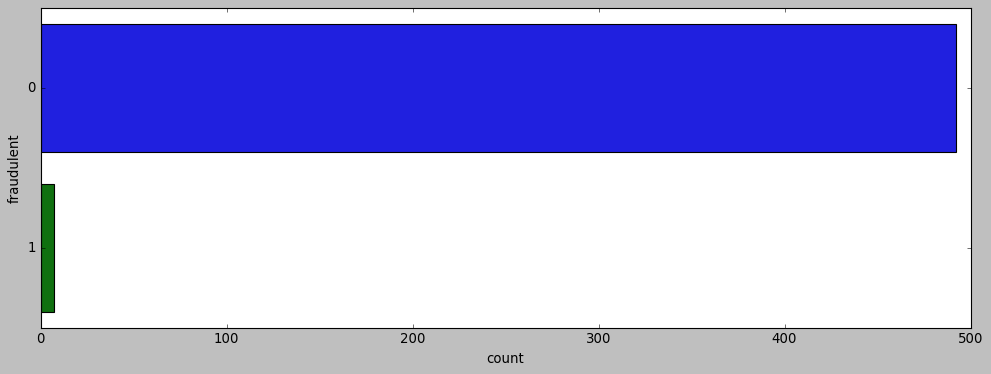

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent', data=df)
plt.show()

In [48]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    492
1      7
Name: fraudulent, dtype: int64

In [49]:
exp = dict(df.required_experience.value_counts())
del exp['']

In [50]:
exp

{'Entry level': 112,
 'Mid-Senior level': 89,
 'Associate': 60,
 'Not Applicable': 30,
 'Director': 12,
 'Internship': 8,
 'Executive': 2}

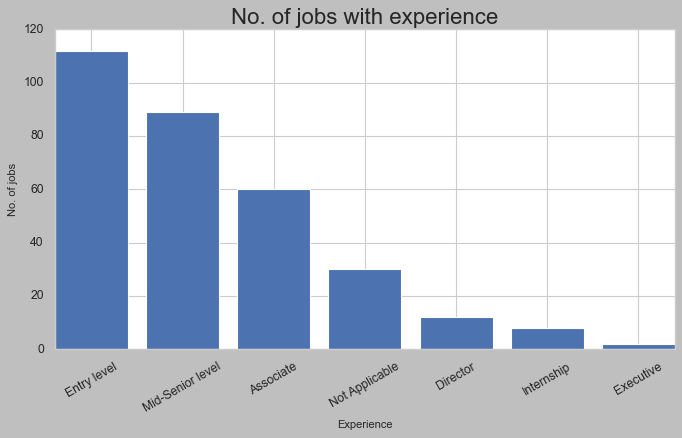

In [51]:
plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
plt.bar(exp.keys(), exp.values())
plt.title('No. of jobs with experience', size=20)
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=30)
plt.show()

In [52]:
edu = dict(df.required_education.value_counts()[:7])
del edu['']
edu

{"Bachelor's Degree": 178,
 'High School or equivalent': 106,
 'Unspecified': 32,
 "Master's Degree": 12,
 'Certification': 3,
 'Some College Coursework Completed': 2}

Text(0.5, 0, 'Education')

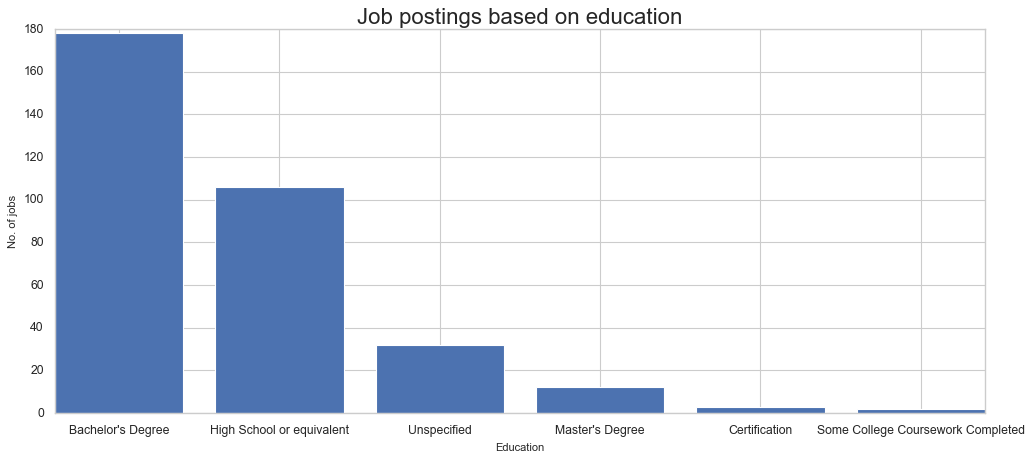

In [53]:
plt.figure(figsize=(15,6))
plt.title('Job postings based on education', size=20)
plt.bar(edu.keys(), edu.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Education', size=10)

In [54]:
print(df[df.fraudulent==0].title.value_counts()[:10]) #to return the unique values for 0 fraud

English Teacher Abroad                                41
Customer Service Associate                            15
Customer Service Associate - Part Time                10
English Teacher Abroad                                 8
Customer Service Technical Specialist                  7
Customer Service Team Lead                             6
Customer Service Associate - Part Time                 5
Graduates: English Teacher Abroad                      5
Customer Service Associate                             3
Graduates: English Teacher Abroad (Conversational)     3
Name: title, dtype: int64


In [55]:
print(df[df.fraudulent==1].title.value_counts()[:10]) #to return the unique values for fraud

IC&E Technician                      1
Forward Cap.                         1
Technician Instrument & Controls     1
Sales Executive                      1
IC&E Technician Mt Poso              1
Financing Auto(car) sales            1
Admin Assistant/ Receptionist        1
Name: title, dtype: int64


In [56]:
df['text']=df['title']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
del df['title']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']

In [57]:
df.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [58]:
fraudjobs_text = df[df.fraudulent==1].text  #value of fraudulent=1 for fraudulent jobs
realjobs_text = df[df.fraudulent==0].text   #value of fraudulent=0 for real jobs

In [59]:
!pip install spacy && python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# TOKENIZING AND DATA CLEANING

In [60]:
punctuations = string.punctuation #to create the list of punctuation marks

nlp = spacy.load("en_core_web_sm") #load pipeline that includes vocabulary,syntax and entities
stop_words = spacy.lang.en.stop_words.STOP_WORDS #to create the list of stop words

parser = English()  # Load English tokenizer, tagger, parser, NER and word vector

def spacy_tokenizer(sentence):     #to tokenize the sentences
    #This function will accepts a sentence as input and processes the sentence into tokens, performing lemmatization, 
    #lowercasing, removing stop words and punctuations
    
    
    # Creating our token object which is used to create documents with linguistic annotations
    mytokens = parser(sentence)    
    
    
    # lemmatizing each token and converting each token in lower case
    # spaCy uses '-PRON-' as lemma for all personal pronouns lkike me, I etc
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON" else word.lower_ for word in mytokens]
    
    
    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    
    
     # Return preprocessed list of tokens
    return mytokens


#DATA CLEANING

# Custom transformer using spacy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        #Override the transform method to clean text
        return [clean_text(text) for text in X]
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def get_params(self, deep=True):
        return {}
    
# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text to lowercase
    return text.strip().lower()

# FEATURE ENGINEERING

In [61]:
df['text'] = df['text'].apply(clean_text)

In [62]:
cv = TfidfVectorizer(max_features = 100)
x = cv.fit_transform(df['text'])
df1 = pd.DataFrame(x.toarray(), columns = cv.get_feature_names())
df.drop(['text'], axis=1, inplace=True)
main_df = pd.concat([df1,df], axis=1)

In [63]:
main_df.head()

,ability,about,all,amp,an,and,are,as,at,based,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.042701,0.000000,0.031033,0.000000,0.771315,0.000000,0.077519,0.000000,0.000000,...,0.000000,0.000000,0.173830,0.049955,0.068971,0.000000,0.000000,0.000000,0.000000,0
1,0.021850,0.096890,0.034553,0.035207,0.028759,0.496654,0.058881,0.058630,0.053567,0.038531,...,0.000000,0.074395,0.153386,0.042505,0.117372,0.085929,0.000000,0.217464,0.137286,0
2,0.000000,0.000000,0.173470,0.035351,0.086629,0.403690,0.118242,0.000000,0.000000,0.000000,...,0.000000,0.059758,0.286019,0.056905,0.000000,0.000000,0.000000,0.100777,0.078768,0
3,0.023326,0.000000,0.018444,0.000000,0.092108,0.706952,0.000000,0.031296,0.038125,0.000000,...,0.023734,0.047653,0.070179,0.045378,0.000000,0.091735,0.018530,0.053575,0.062812,0
4,0.000000,0.000000,0.067752,0.034517,0.028196,0.626038,0.086591,0.114962,0.000000,0.000000,...,0.000000,0.000000,0.150379,0.027782,0.038357,0.000000,0.034034,0.032800,0.115367,0


# SPLITTING OF DATA INTO TRAINING AND TESTING SET 

In [64]:
Y = main_df.iloc[:, -1]
X = main_df.iloc[:, :-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(349, 100)
(349,)
(150, 100)
(150,)


In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model = rfc.fit(X_train,Y_train)

In [66]:
print(X_test)

      ability     about       all       amp        an       and       are  \
206  0.000000  0.084724  0.030215  0.000000  0.075445  0.620417  0.051488   
113  0.000000  0.000000  0.000000  0.185968  0.060764  0.574642  0.062203   
165  0.031028  0.000000  0.024534  0.000000  0.081679  0.503762  0.209035   
441  0.000000  0.000000  0.000000  0.133895  0.328119  0.269828  0.000000   
212  0.105500  0.000000  0.083418  0.042498  0.034715  0.570959  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
135  0.000000  0.000000  0.000000  0.220584  0.000000  0.000000  0.000000   
93   0.000000  0.000000  0.000000  0.000000  0.037623  0.649724  0.000000   
25   0.000000  0.000000  0.016531  0.117907  0.027518  0.418645  0.169020   
138  0.000000  0.000000  0.197638  0.033563  0.027416  0.608734  0.000000   
2    0.000000  0.000000  0.173470  0.035351  0.086629  0.403690  0.118242   

           as        at     based  ...      well       who      will  \
206

In [67]:
pred = rfc.predict(X_test)
score = accuracy_score(Y_test, pred)
score

0.9666666666666667

In [68]:
print('Classification Report\n')
print(classification_report(Y_test, pred))
print('Confusion Matrix\n')
print(confusion_matrix(Y_test, pred))

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       145
           1       0.00      0.00      0.00         5

    accuracy                           0.97       150
   macro avg       0.48      0.50      0.49       150
weighted avg       0.93      0.97      0.95       150

Confusion Matrix

[[145   0]
 [  5   0]]


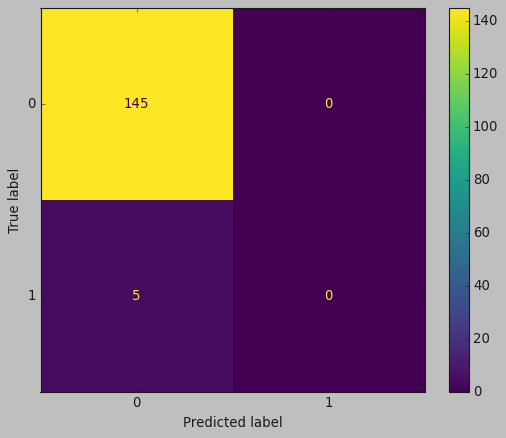

In [69]:
style.use('classic')
cm = confusion_matrix(Y_test, pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rfc.classes_)
disp.plot()